In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path


import matplotlib.pyplot as plt


import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  nru_DE import *
from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "33k_PBMC"

data_path = Path ( data_folder + data_subfolder )

In [3]:
 # output plot
plot_jpg =  data_subfolder + "_Figure_1.jpg"

# input data
counts_pkl = "counts_sparse.pkl" # sparse pandas data frame: cells in columns; genes in rows
nru_dict_pkl =  "nru_dict.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# paths: input data
counts_dsn = data_path / counts_pkl
nru_dict_dsn = data_path / nru_dict_pkl   

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]		
		

bins_nz = [ 0, 10, 50, 100, 1000, 10000, 1e6]
labels_nz = ['1-10', '11-50', '51-100', '101-1,000', '1,001-10,000','10,001+']

bins_MSSQ_PR = [  0, 1, 2 , 1e6]
labels_MSSQ_PR = [ '<=1', '1<-2', '>2']

In [5]:
#### compute mean SSQ of Pearson residuals for ALL genes with nonzero counts

df_counts_sparse = pd.read_pickle ( counts_dsn )
print ( ' df_counts_sparse:' )
print ( df_counts_sparse )
print ( '\n type( df_counts_sparse ) ', type ( df_counts_sparse ))
print ( '\n df_counts_sparse.sparse.density: ', df_counts_sparse.sparse.density)

 df_counts_sparse:
                 AAACATTGACGACT-1  AAACATTGACGGGA-1  ...  TTTGCATGGATAAG-6  \
ENSEMBL_ID                                           ...                     
ENSG00000239945                 0                 0  ...                 0   
ENSG00000237683                 0                 0  ...                 0   
ENSG00000228463                 0                 0  ...                 0   
ENSG00000235373                 0                 0  ...                 0   
ENSG00000228327                 0                 0  ...                 0   
...                           ...               ...  ...               ...   
ENSG00000212884                 0                 0  ...                 0   
ENSG00000215615                 0                 0  ...                 0   
ENSG00000215764                 0                 0  ...                 0   
ENSG00000215700                 1                 0  ...                 1   
ENSG00000215699                 0            

In [6]:
#### sparse matrix input to function mean_SSQ_Pearson_residuals
 
counts_scipy_csr_mat = df_counts_sparse.sparse.to_coo().tocsr()
print ( ' counts_scipy_csr_mat:' )
print ( counts_scipy_csr_mat )

 counts_scipy_csr_mat:
  (0, 25357)	1
  (1, 320)	1
  (1, 993)	1
  (1, 1172)	1
  (1, 1192)	1
  (1, 1407)	2
  (1, 2091)	1
  (1, 2164)	1
  (1, 2197)	1
  (1, 2343)	1
  (1, 2416)	1
  (1, 2582)	1
  (1, 2921)	1
  (1, 2929)	1
  (1, 2968)	1
  (1, 3124)	1
  (1, 3501)	1
  (1, 3620)	1
  (1, 3661)	1
  (1, 4148)	1
  (1, 4304)	1
  (1, 4887)	1
  (1, 5069)	1
  (1, 5358)	1
  (1, 5602)	1
  :	:
  (20677, 32108)	7
  (20677, 32134)	1
  (20677, 32157)	1
  (20677, 32197)	1
  (20677, 32207)	1
  (20677, 32273)	1
  (20677, 32297)	1
  (20677, 32361)	1
  (20677, 32435)	1
  (20677, 32462)	1
  (20677, 32508)	1
  (20677, 32516)	1
  (20677, 32541)	1
  (20677, 32562)	1
  (20677, 32589)	1
  (20677, 32631)	2
  (20677, 32673)	1
  (20677, 32729)	1
  (20677, 32749)	1
  (20677, 32952)	1
  (20677, 32957)	1
  (20677, 32968)	1
  (20677, 32975)	1
  (20677, 32997)	1
  (20677, 33047)	1


In [7]:
df_all_nz_genes = df_counts_sparse.sum ( axis=1 ).to_frame ( name='count' )
counts_GT_0 = ( counts_scipy_csr_mat > 0 ).astype( int )  
df_all_nz_genes['nz_cells'] = np.ravel ( counts_GT_0.sum ( axis=1 ) )

gene_list = df_all_nz_genes.index.values.tolist()
df_all_nz_genes['M_g'] = mean_SSQ_Pearson_residuals ( counts_scipy_csr_mat, gene_list, 1000 )

print ( '\n\n df_all_nz_genes'  )
print ( df_all_nz_genes  )

print ( '\n\n df_all_nz_genes.describe' )
print ( df_all_nz_genes.describe ( percentiles=pctl_list ) )



 df_all_nz_genes
                 count  nz_cells       M_g
ENSEMBL_ID                                
ENSG00000239945      1         1  0.803516
ENSG00000237683    104       103  1.045259
ENSG00000228463     10        10  0.897082
ENSG00000235373      2         2  0.945444
ENSG00000228327     22        22  0.811878
...                ...       ...       ...
ENSG00000212884     23        23  0.975559
ENSG00000215615     79        79  1.109134
ENSG00000215764      5         5  1.304526
ENSG00000215700    886       875  1.011546
ENSG00000215699    778       756  1.096307

[20678 rows x 3 columns]


 df_all_nz_genes.describe
              count      nz_cells           M_g
count  2.067800e+04  20678.000000  20678.000000
mean   3.298900e+03   1227.507061      1.342329
std    3.193160e+04   3421.538620      4.348232
min    1.000000e+00      1.000000      0.144494
1%     1.000000e+00      1.000000      0.456847
5%     1.000000e+00      1.000000      0.701274
10%    2.000000e+00      2.00000

In [8]:
df_all_nz_genes['nonzero cells'] = pd.cut ( df_all_nz_genes['nz_cells'], bins_nz, labels=labels_nz )
df_all_nz_genes['M_g_category'] = pd.cut ( df_all_nz_genes['M_g'], bins_MSSQ_PR, labels=labels_MSSQ_PR )
pt_nz_vs_Mg = pv_table_noprint_margins ( df_all_nz_genes, 'nonzero cells', 'M_g_category' )

print ( '\n\n Table 2 \n relation between # nonzero_cells  and  mean SSQ of Pearson residuals \n' )
print ( pt_nz_vs_Mg )



 Table 2 
 relation between # nonzero_cells  and  mean SSQ of Pearson residuals 

M_g_category    <=1   1<-2    >2  Total
nonzero cells                          
1-10           2768   2492   210   5470
11-50          1069   1723   124   2916
51-100          334    839    94   1267
101-1,000       802   4826   507   6135
1,001-10,000     55   4169   190   4414
10,001+           0    335   141    476
Total          5028  14384  1266  20678


In [9]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]

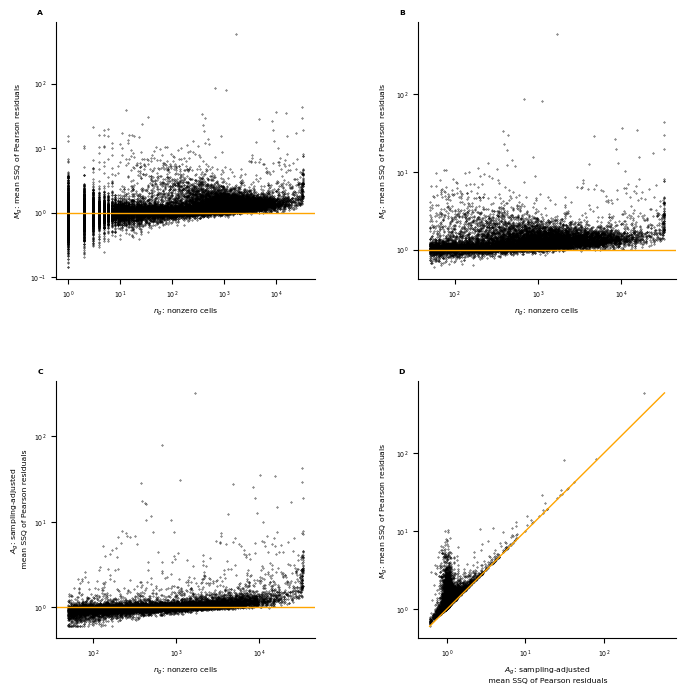

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )
  
plot_ax ( df_all_nz_genes, ax1, 'A', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )  
plot_ax ( df_gene_stats, ax2, 'B', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax3, 'C', 'nz_cells', 'A_g', '$n_g$: nonzero cells', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax4, 'D', 'A_g', 'M_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', '$M_g$: mean SSQ of Pearson residuals'  )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( plot_dsn, transparent=True, dpi=300 )